# Removing Color

Complete the following tasks to convert a color picture into black and white.

In [1]:
# Don't modify this cell, just run it. 

import numpy as np
import matplotlib.pyplot as plt
from EC_CV import *
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
import cv2

rcParams['figure.figsize'] = (10, 8)


(1200, 1200, 3)

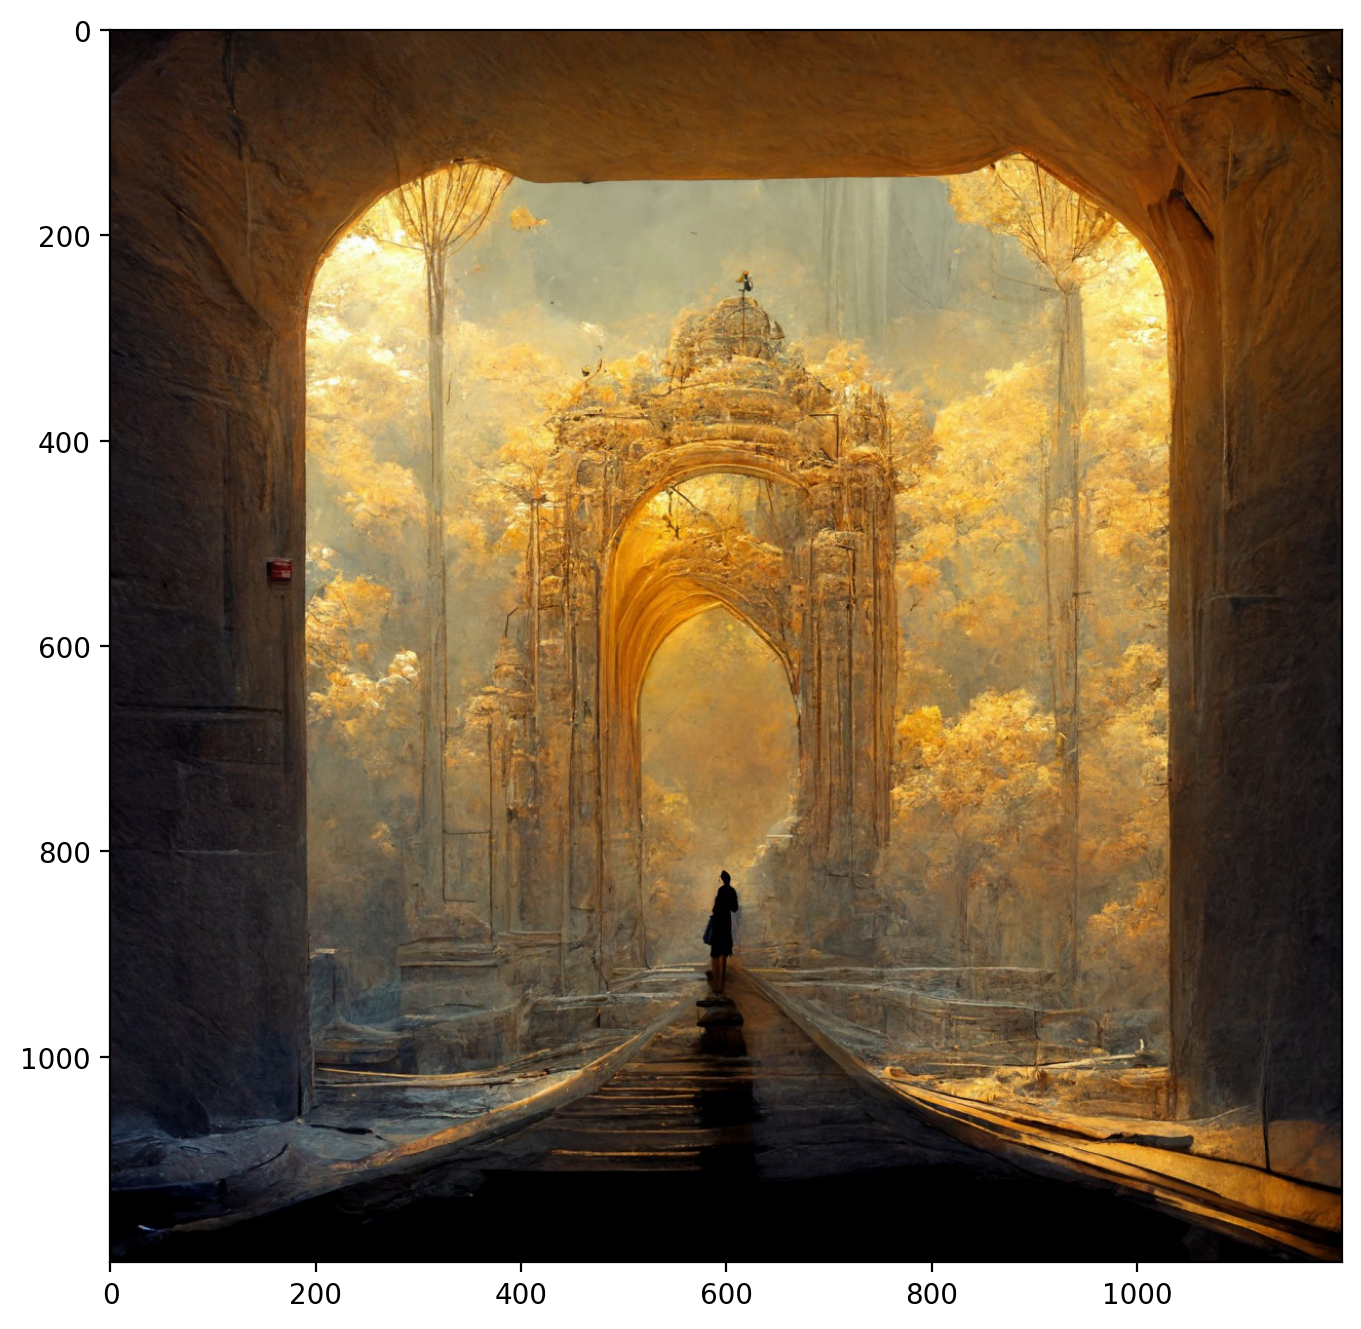

In [8]:
# Task #1: Print a color image
#
# Copy an image file of your own in this folder, 
# open it and display it.

# Write your code here
pic = (plt.imread('midj.jpeg'))
plt.imshow(pic)
np.shape(pic)

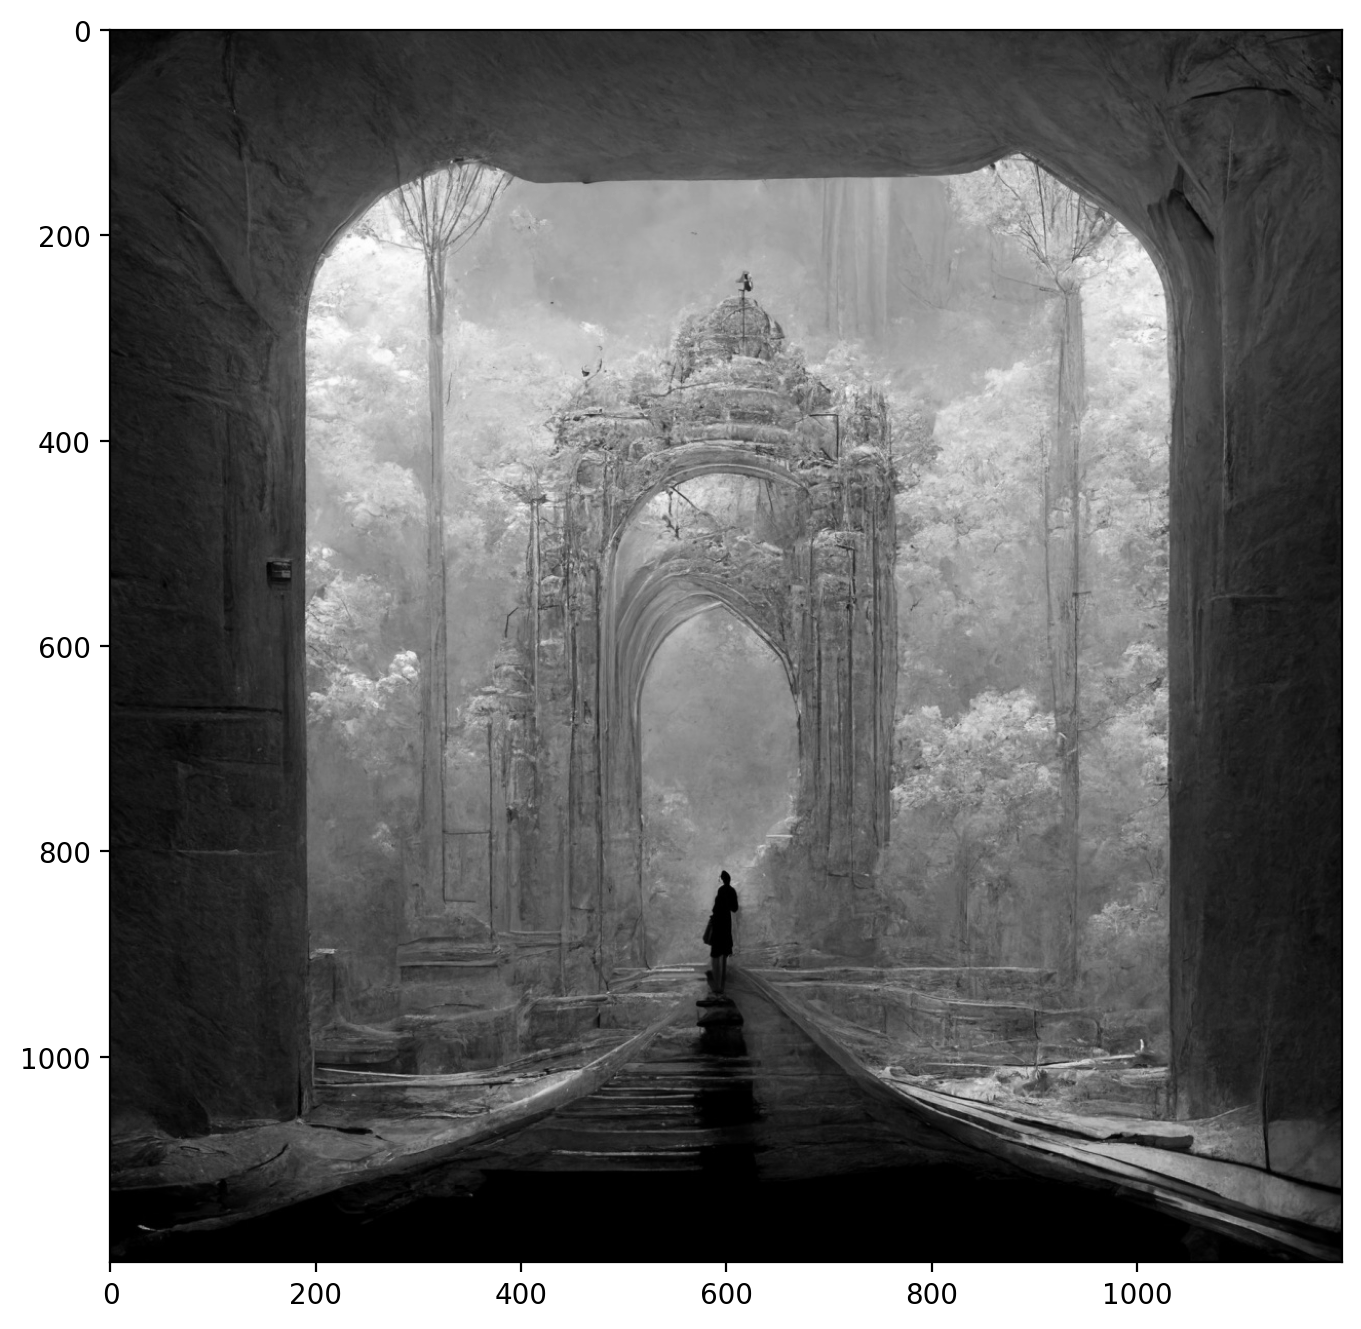

In [9]:
# Task #2: Convert the color image to grayscale.
#
# Use the weights we used before:
#                              Red: 0.299
#                            Green: 0.587
#                             Blue: 0.114
#

# Write your code here
pic_wgt = np.dot(pic[..., :3], [0.299, 0.587, 0.114])
plt.imshow(pic_wgt, cmap = 'gray')


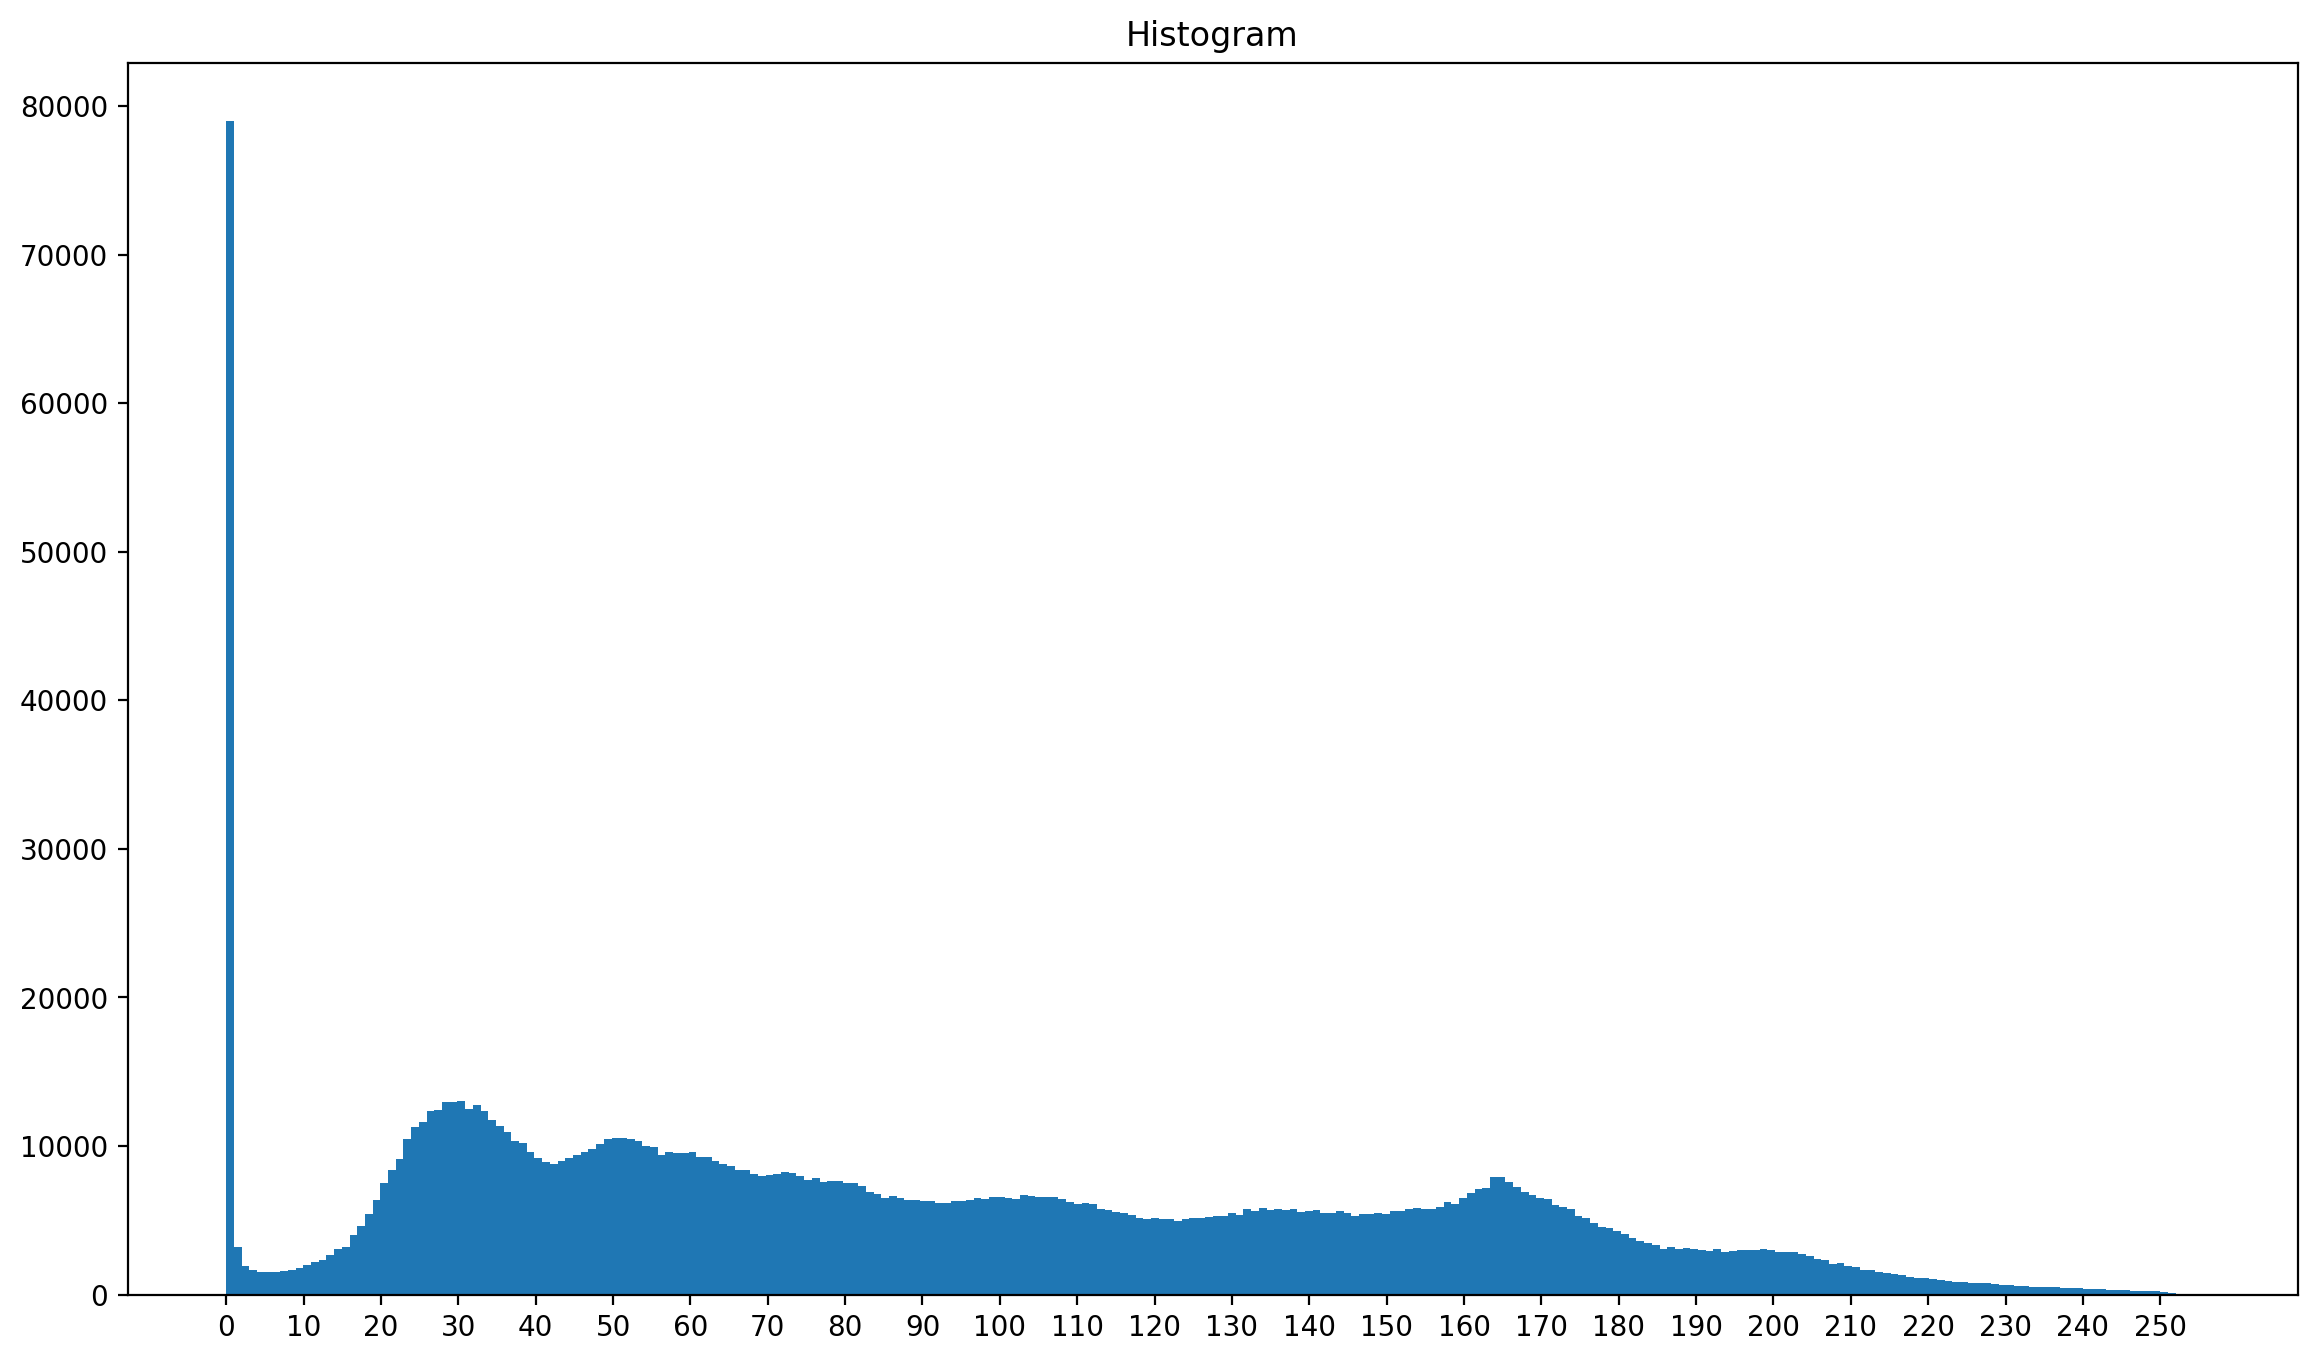

In [10]:
# Task #3: Plot a histogram 
#
# In this cell, plot a histogram of your grayscale image
# and try to come up with a suitable global threshold.

# Write your code here
rcParams['figure.figsize'] = (14,8)
plt.hist(pic_wgt.ravel(), 256, [0,255])
plt.title('Histogram')
plt.xticks(np.arange(0,255,10))
plt.show()

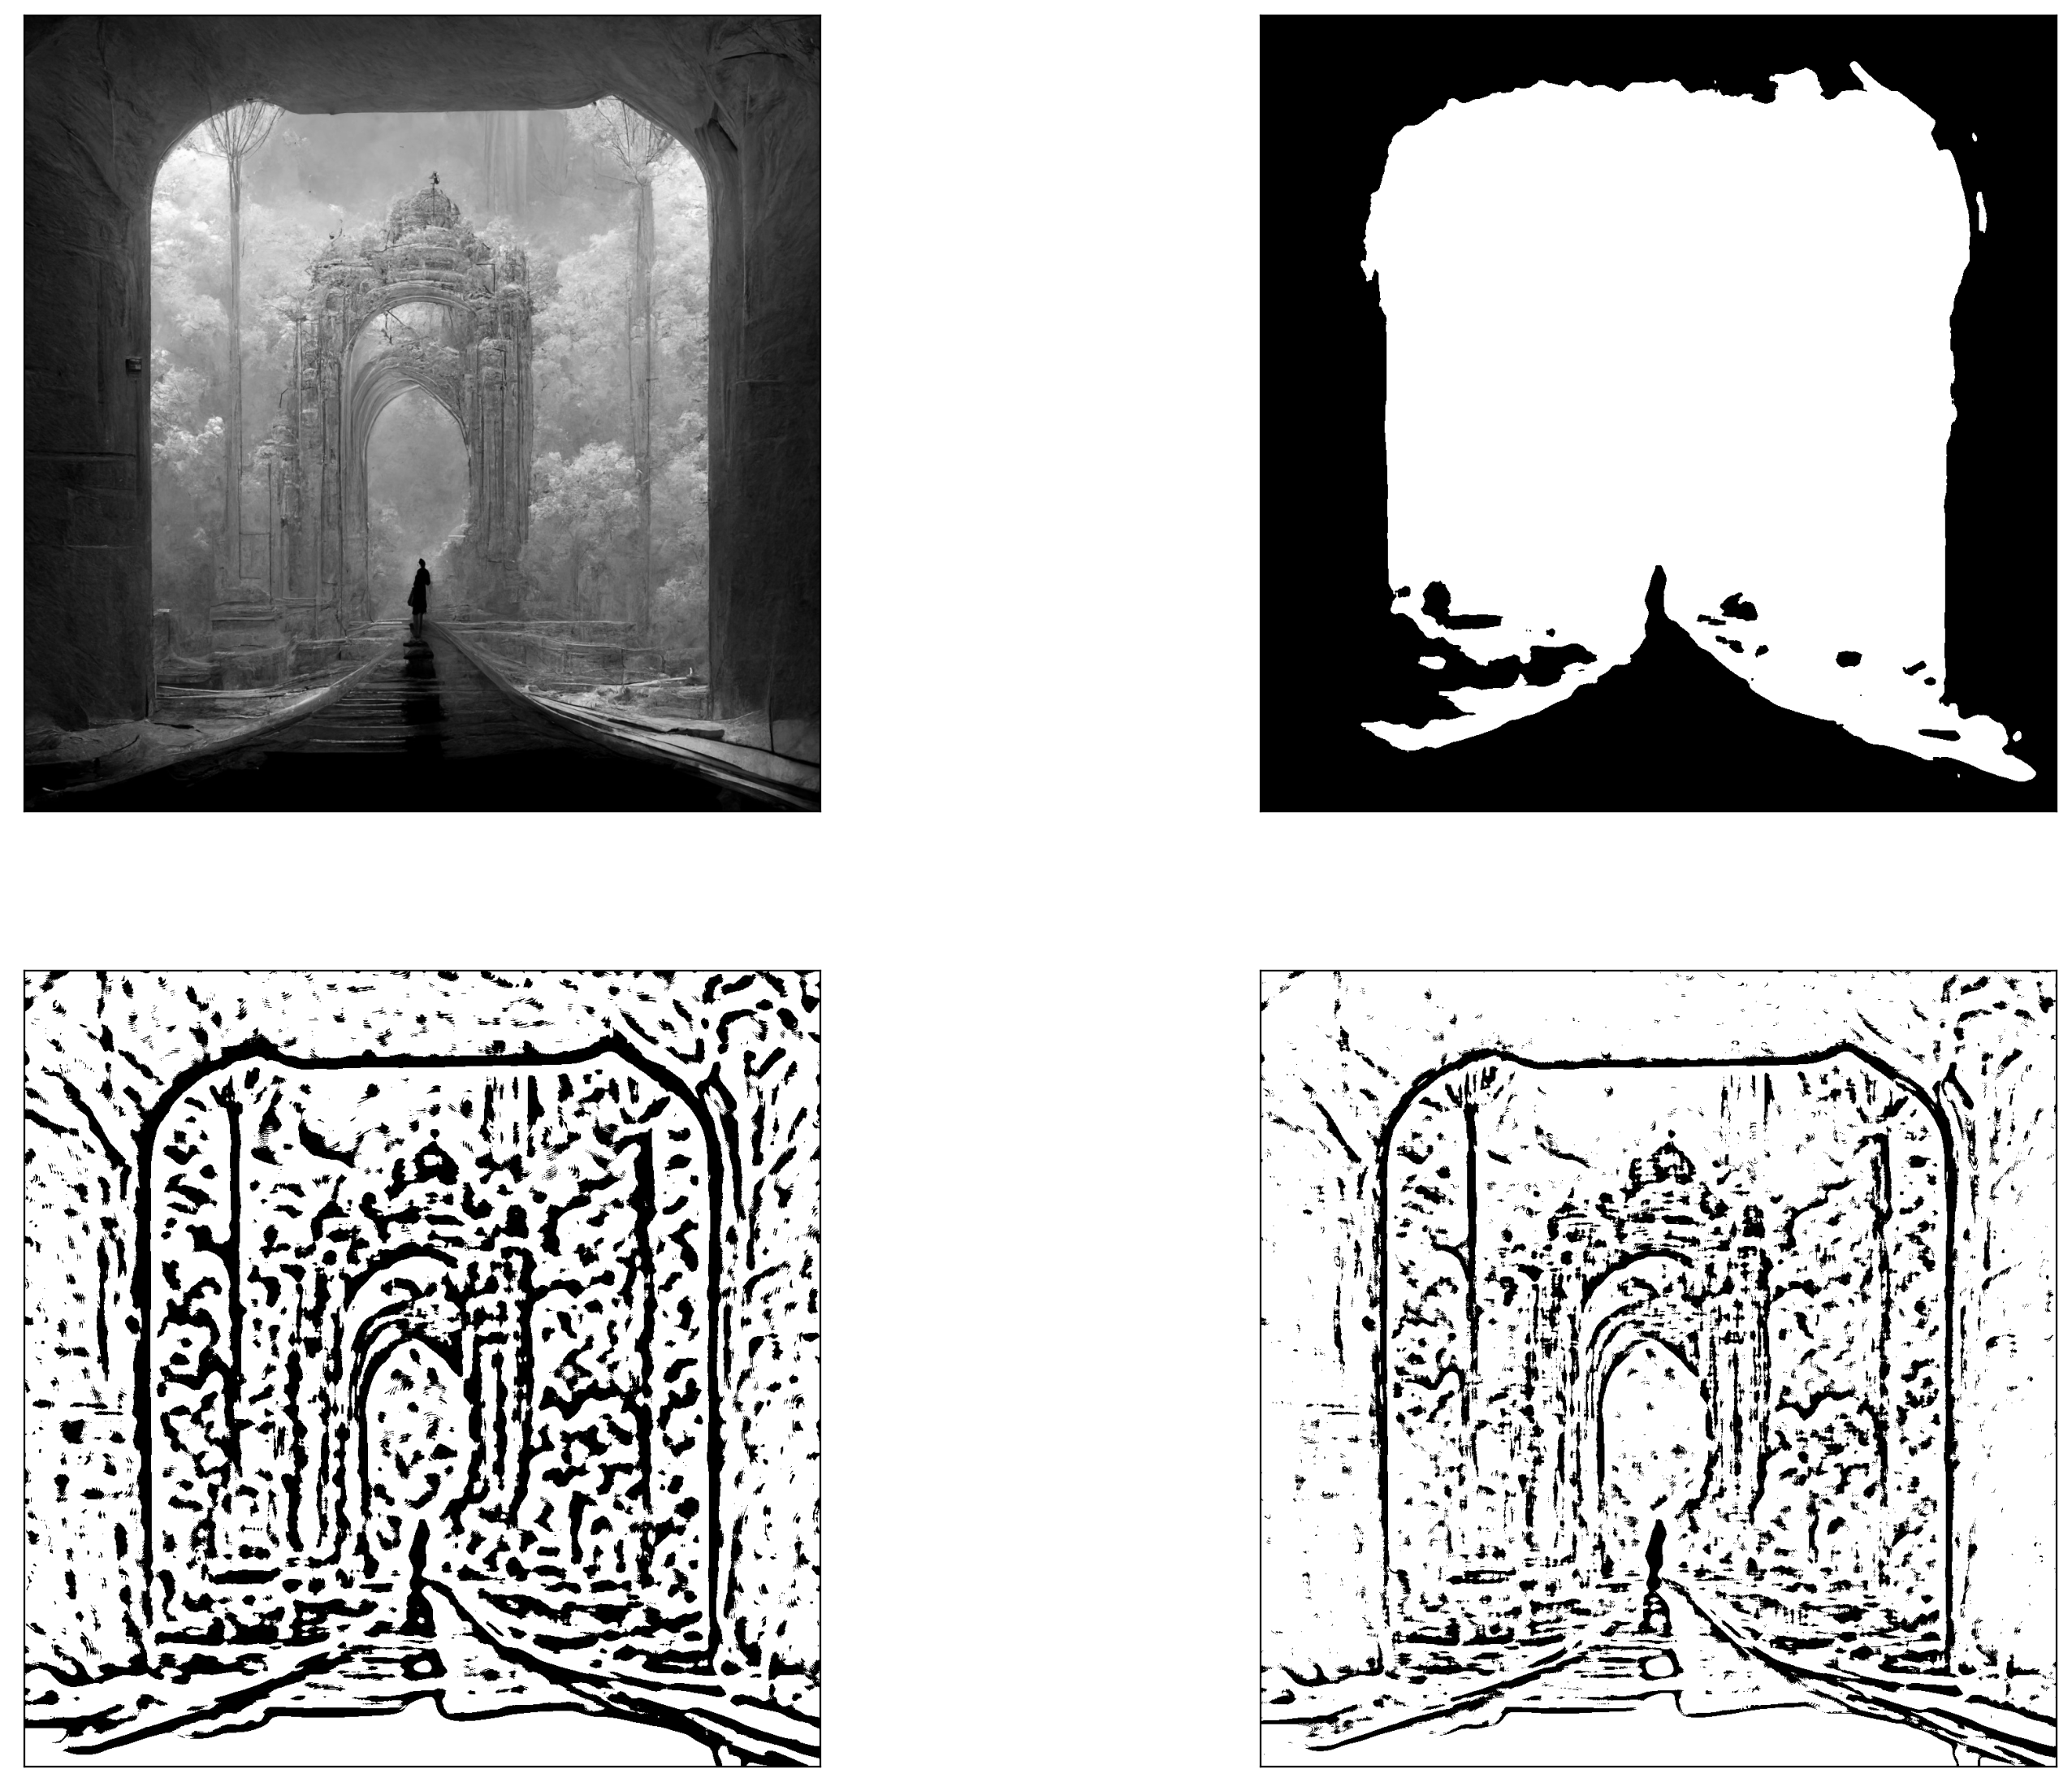

In [18]:
# Task #4: Compare two Black and White Images
#
# Pick two global thresholds from the histogram above and compare  
# the two resulting images. 
# Feel free to use OpenCV or grayscale_to_BW() from EC_CV.py

# Write your code here

rcParams['figure.figsize'] = (18,14)
threshold = 75
img0 = cv2.imread("midj.jpeg", 0)
img = cv2.medianBlur(img0, 17)
ret, th1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33,2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33,2)
titles = ['Original Image', 'Global Thresholding (v = '+str(threshold)+')',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img0, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')
#     plt.title[titles[i]]
    plt.xticks([]),plt.yticks([])
plt.show()